In [1]:
from joblib import load
import pandas as pd
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, f1_score
import gpplot

In [2]:
c3_df = pd.read_csv('../data/raw/C3_anonymized.csv')
model = load('../data/models/bow/gb_model.joblib')
mono_vectorizer  = load('../data/models/bow/mono_vectorizer.joblib')
bi_vectorizer = load('../data/models/bow/bi_vectorizer.joblib')

In [3]:
c3_comments = c3_df['comment_text']
mono_X = mono_vectorizer.transform(c3_comments)
bi_X = bi_vectorizer.transform(c3_comments)
sparse_X = hstack([mono_X, bi_X])

In [4]:
c3_predictions = model.predict_proba(sparse_X)
c3_df['prediction'] = c3_predictions[:,1]

In [5]:
c3_df

,article_id,comment_author,comment_counter,comment_text,njudgements_constructiveness_expt,njudgements_toxicity_expt,agree_constructiveness_expt,agree_toxicity_expt,constructive,crowd_toxicity_level,...,non_constructive_characteristics,toxicity_characteristics,crowd_comments_constructiveness_expt,crowd_comments_toxicity_expt,other_con_chars,other_noncon_chars,other_toxic_chars,constructive_binary,pp_comment_text,prediction
0,26023945,0,source1_26023945_62,And this Conservative strategy has produced th...,3.0,3.0,0.17,0.50,1.0,4.0,...,no_non_con:3\nprovocative:1,abusive:3\npersonal_attack:1\nteasing:1\nembar...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,And this Conservative strategy has produced th...,0.540601
1,24565777,1,source1_24565777_106,I commend Harper for holding the debates outsi...,3.0,3.0,0.33,0.17,1.0,3.0,...,no_non_con:2\nno_respect:1,abusive:1\npersonal_attack:1\nteasing:1\nembar...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,I commend Harper for holding the debates outsi...,0.564065
2,28775443,2,source1_28775443_136,What a joke Rachel Notley is. This is what was...,3.0,3.0,0.83,0.00,1.0,3.0,...,no_non_con:2\nprovocative:1,personal_attack:3\ninflammatory:3\nteasing:3\n...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,What a joke Rachel Notley is . This is what wa...,0.715632
3,8996700,3,source1_8996700_50,Do you need to write an essay to prove the poi...,3.0,3.0,1.00,0.83,1.0,3.0,...,no_non_con:2\nnon_relevant:1,personal_attack:2\nteasing:2\nembarrassment:2\...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,Do you need to write an essay to prove the poi...,0.535928
4,29405071,4,source1_29405071_126,Rob Ford was no saint. He should never have be...,3.0,3.0,0.83,0.33,1.0,3.0,...,no_non_con:3,teasing:3\npersonal_attack:2\nabusive:1\nembar...,\n\n,\n\n,\n\n,\n\n,\n\n,1.0,Rob Ford was no saint . He should never have b...,0.335069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,27047599,5518,source1_27047599_144,How many Liberal MP's have some affiliation to...,5.0,5.0,0.20,0.30,0.0,1.0,...,no_non_con:3\nnon_relevant:2\nno_respect:1\nun...,no_toxic:5,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,0.0,How many Liberal MPs have some affiliation to ...,0.469575
11996,27047599,635,source1_27047599_56,Ontario certainly has the government they dese...,5.0,5.0,0.30,0.50,0.0,1.0,...,no_non_con:2\nunsubstantial:2\nnon_relevant:1\...,no_toxic:5,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,0.0,Ontario certainly has the government they dese...,0.482387
11997,27047599,2058,source1_27047599_63,4th grade teachers....proud members of the 1%!,5.0,5.0,0.30,0.30,0.0,1.0,...,non_relevant:2\nno_non_con:1\nsarcastic:1\npro...,no_toxic:5,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,0.0,4th grade teachers ... .proud members of the 1...,0.484613
11998,27047599,1585,source1_27047599_18,The Kathleen McGuinty government has a sweethe...,5.0,5.0,0.20,1.00,0.0,1.0,...,no_non_con:2\nsarcastic:1\nunsubstantial:1\nno...,no_toxic:5,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,\n\n\n\n,0.0,The Kathleen McGuinty government has a sweethe...,0.491872


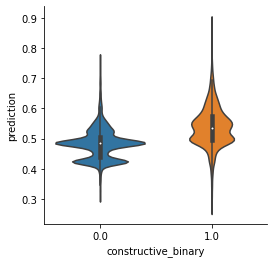

In [6]:
plt.figure(figsize=(4, 4))
sns.violinplot(data=c3_df, x='constructive_binary', y='prediction')
sns.despine()

In [7]:
fpr, tpr, thresholds = roc_curve(c3_df['constructive_binary'],
                                 c3_df['prediction'])
roc_auc = auc(fpr, tpr)

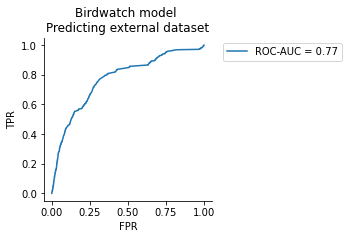

In [11]:
plt.figure(figsize=(3, 3))
plt.plot(fpr, tpr, label='ROC-AUC = ' + str(round(roc_auc, 2)))
sns.despine()
plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Birdwatch model \nPredicting external dataset')
gpplot.savefig('../figures/CCC_roc_auc.png', dpi=300)

In [9]:
f1 = f1_score(c3_df['constructive_binary'],
              (c3_df['prediction'] > 0.5).astype(int))
print(f1)

0.7426968917971488
